In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [63]:
from sklearn.decomposition import PCA
from sklearn import metrics

In [64]:
from tensorflow import keras
from tensorflow.keras import layers


In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [66]:
from sklearn.utils import resample
from matplotlib import pyplot
from numpy import mean
from numpy import std
from numpy import array
from numpy import dstack

In [67]:
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
import os
from datetime import datetime

In [68]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [69]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [70]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [71]:
def tie_dataset(feature, label, timestep = 24, want_period = 1):
    feature_list = []
    label_list = []

    for i in range(timestep, len(feature)-want_period):
        feature_list.append(feature[i-timestep:i])
        label_list.append(label[i:i+want_period]) 
        #label_list.append(label[i])
    return np.array(feature_list), np.array(label_list)

In [94]:
def generate_model_lstm(trainX, trainy):
    
    model = Sequential()
    #model.add(LSTM(64, activation='tanh', return_sequences=True))
    model.add(LSTM(64, activation='tanh'))
    model.add(Dense(1))
   
    model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
    
    early_stop = EarlyStopping(monitor='val_loss', patience=10)
    filename = os.path.join('/content/gdrive/My Drive/Colab Notebooks', 'generation_lstm_checkpoint.h5')
    checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

    model.fit(trainX, trainy, epochs=20, validation_split = 0.2, verbose=0,  
                    callbacks=[early_stop, checkpoint])
    
    return model




def generate_model_cnn(trainX, trainy):   
    
    model = Sequential()
    model.add(Conv1D(filters=4, kernel_size= 1, activation='relu'))
    model.add(MaxPooling1D(pool_size=2)) # 데이터 크기 1/2로 줄여줌
    #model.add(Flatten()) # 다차원 배열을 1차원으로 바꿔줌

    #model.add(LSTM(64, activation='relu', return_sequences=True))
    model.add(LSTM(64, activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
    early_stop = EarlyStopping(monitor='val_loss', patience=10)
    filename = os.path.join('/content/gdrive/My Drive/Colab Notebooks', 'generation_cnnlsmt_checkpoint.h5')
    checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

    model.fit(trainX, trainy, epochs=20, validation_split = 0.2, verbose=0,  
                    callbacks=[early_stop, checkpoint])

    return model 



 
def generate_model_gru(trainX, trainy):   

    model = Sequential()
    #model.add(GRU(64, activation='tanh', return_sequences=True))
    model.add(GRU(64, activation='tanh'))
    model.add(Dense(1))
   
    model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
    
    early_stop = EarlyStopping(monitor='val_loss', patience=10)
    filename = os.path.join('/content/gdrive/My Drive/Colab Notebooks', 'generation_gru_checkpoint.h5')
    checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

    model.fit(trainX, trainy, epochs=20, validation_split = 0.2, verbose=0,  
                    callbacks=[early_stop, checkpoint])

    return model



def generate_model_mlp(trainX, trainy):   

    model = Sequential()
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(1))
   
    model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
    
    early_stop = EarlyStopping(monitor='val_loss', patience=10)
    filename = os.path.join('/content/gdrive/My Drive/Colab Notebooks', 'generation_mlp_checkpoint.h5')
    checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

    model.fit(trainX, trainy, epochs=20, validation_split = 0.2, verbose=0,  
                    callbacks=[early_stop, checkpoint])

    
    return model


def generate_meta_model(trainX, trainy):
    model = Sequential()
    model.add(LSTM(64, activation='tanh', return_sequences=True))
    model.add(LSTM(64, activation='tanh'))
    #model.add(Dense(4, activation='tanh'))
    model.add(Dense(1))
   
    model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
    
    early_stop = EarlyStopping(monitor='val_loss', patience=10)
    filename = os.path.join('/content/gdrive/My Drive/Colab Notebooks', 'generation_lstm_checkpoint.h5')
    checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

    model.fit(trainX, trainy, epochs=300, validation_split = 0.2, verbose=0,  
                    callbacks=[early_stop, checkpoint])
    
    return model


# def train_model(model, trainX, trainy):

#     model.compile(loss='mse',
#                 optimizer='adam',
#                 metrics=['mae', 'mse'])
#     early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
#     model.fit(trainX, trainy, epochs=20, validation_split = 0.2, verbose=0, 
#                     callbacks=[early_stop, tfdocs.modeling.EpochDots()])
    
#     return model

In [73]:
def load_all_models(n_models):
	all_models = list()
	for i in range(n_models):
		# define filename for this ensemble
		filename = '/content/gdrive/My Drive/Colab Notebooks/model_' + str(i + 1) + '.h5'
		# load model from file
		model = tf.keras.models.load_model(filename)
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models

In [74]:
df = pd.read_csv(os.path.join('/content/gdrive/My Drive/Colab Notebooks', 'train_hourly.csv'), encoding='utf8')
df_forecast = pd.read_csv(os.path.join('/content/gdrive/My Drive/Colab Notebooks', 'test_hourly.csv'), encoding='cp949')

In [75]:
#Split dataset into training and testing set
train_size = int(len(df)*0.7)
test_size = int(len(df)*0.3)
 
# train_dataset = df[:train_size, ['month', 'day', 'hour', 'temperature', 'humidity', 'dew_point', 'sol_rad', 'cloud', 'pow_gen']]
train_dataset = df.iloc[:train_size, [1,2,3,4,5,6,7,8,9]]
test_dataset = df.iloc[train_size : train_size+test_size, [1,2,3,4,5,6,7,8,9]]                     #시 발전량 기온 습도 이슬점온도 일사량 전운량
# test_dataset = df_forecast[['month', 'day', 'hour', 'temperature', 'humidity', 'dew_point', 'sol_rad', 'cloud', 'pow_gen']]

In [76]:
all_train = pd.concat([train_dataset, test_dataset], axis=0)

In [77]:
train_stats = all_train.describe()
train_stats.pop("pow_gen")
train_stats = train_stats.transpose()

In [78]:
train_labels = train_dataset.pop('pow_gen')
test_labels = test_dataset.pop('pow_gen')

In [79]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
    
train_final= normed_train_data.values
test_final = normed_test_data.values
target=train_labels.values
test_target=test_labels.values


In [80]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(train_final)
    
pca_train = pca.transform(train_final)
pca_test = pca.transform(test_final)


In [81]:
trainX, trainy = tie_dataset(pca_train, target)
testX, testy = tie_dataset(pca_test, test_target)

testX_mlp = pca_test[-4851:]
testy_mlp = test_target

testX_mlp.shape

(4851, 6)

In [82]:
members = list()

model = generate_model_lstm(trainX, trainy)
members.append(model)

model = generate_model_cnn(trainX, trainy)
members.append(model)

model = generate_model_gru(trainX, trainy)
members.append(model)

model = generate_model_mlp(pca_train, target)
members.append(model)


Epoch 00001: val_loss improved from inf to 430561.03125, saving model to /content/gdrive/My Drive/Colab Notebooks/generation_lstm_checkpoint.h5

Epoch 00002: val_loss improved from 430561.03125 to 410404.03125, saving model to /content/gdrive/My Drive/Colab Notebooks/generation_lstm_checkpoint.h5

Epoch 00003: val_loss improved from 410404.03125 to 391828.03125, saving model to /content/gdrive/My Drive/Colab Notebooks/generation_lstm_checkpoint.h5

Epoch 00004: val_loss improved from 391828.03125 to 374363.15625, saving model to /content/gdrive/My Drive/Colab Notebooks/generation_lstm_checkpoint.h5

Epoch 00005: val_loss improved from 374363.15625 to 357887.21875, saving model to /content/gdrive/My Drive/Colab Notebooks/generation_lstm_checkpoint.h5

Epoch 00006: val_loss improved from 357887.21875 to 342235.43750, saving model to /content/gdrive/My Drive/Colab Notebooks/generation_lstm_checkpoint.h5

Epoch 00007: val_loss improved from 342235.43750 to 327383.43750, saving model to /c

In [83]:
n_splits = 4
for i in range(n_splits):
	#model = generate_model_lstm(trainX, trainy)
	filename = '/content/gdrive/My Drive/Colab Notebooks/model_' + str(i + 1) + '.h5'
	members[i].save(filename)
	print('>Saved %s' % filename)

>Saved /content/gdrive/My Drive/Colab Notebooks/model_1.h5
>Saved /content/gdrive/My Drive/Colab Notebooks/model_2.h5
>Saved /content/gdrive/My Drive/Colab Notebooks/model_3.h5
>Saved /content/gdrive/My Drive/Colab Notebooks/model_4.h5


In [95]:
n_splits = 4
members = load_all_models(4)
print('Loaded %d models' % len(members))

>loaded /content/gdrive/My Drive/Colab Notebooks/model_1.h5
>loaded /content/gdrive/My Drive/Colab Notebooks/model_2.h5
>loaded /content/gdrive/My Drive/Colab Notebooks/model_3.h5
>loaded /content/gdrive/My Drive/Colab Notebooks/model_4.h5
Loaded 4 models


In [96]:
LS = members[0].predict(testX)
CN = members[1].predict(testX)
GR = members[2].predict(testX)
ML = members[3].predict(testX_mlp)

ls_mse = mean_squared_error(testy, LS, squared=False)
cn_mse = mean_squared_error(testy, CN, squared=False)
gr_mse = mean_squared_error(testy, GR, squared=False)
ml_mse = mean_squared_error(testy, ML, squared=False)

ls_mse, cn_mse, gr_mse, ml_mse

(412.6207767196344, 169.83121994877732, 413.4027540479974, 396.1394346902072)

In [97]:
pred = [LS, CN, GR, ML]


In [98]:
stackX = None
for i in range(n_splits):
    if i == 3:
        yhat = members[i].predict(testX_mlp)
    else:
        yhat = members[i].predict(testX)
    if stackX is None:
        stackX = yhat
    else:
        stackX = dstack((stackX, yhat))
# stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))

stackX.shape

(4851, 1, 4)

In [ ]:
model = generate_meta_model(stackX, testy)

In [100]:
yhat = model.predict(stackX)
yhat = yhat.reshape(yhat.shape[0], yhat.shape[1])
yhat

array([[100.39479 ],
       [ 29.280357],
       [ 30.974361],
       ...,
       [903.12756 ],
       [752.1546  ],
       [583.047   ]], dtype=float32)

In [101]:
stack_mse = mean_squared_error(testy, yhat, squared = False)
stack_mse

165.17917138433825

In [102]:
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 18,
    'figure.figsize': (12, 5),
    'axes.grid' : True, 'axes.grid.axis': 'y'
})

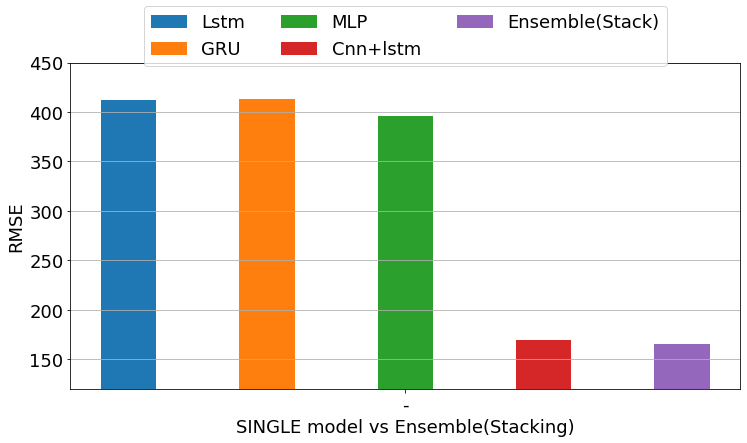

In [103]:

fig, ax = plt.subplots(figsize=(12,6))

ax.set_ylabel('RMSE')
ax.set_xlabel('SINGLE model vs Ensemble(Stacking)')
width = 0.25
x_axis = np.arange(1)

rects1 = ax.bar(x_axis - 2*width, mean(ls_mse), 0.1, label='Lstm')
rects2 = ax.bar(x_axis - width, mean(gr_mse), 0.1, label='GRU')
rects3 = ax.bar(x_axis, mean(ml_mse), 0.1, label='MLP')
rects4 = ax.bar(x_axis + width, mean(cn_mse), 0.1, label='Cnn+lstm')
rects5 = ax.bar(x_axis + 2*width, mean(stack_mse), 0.1, label='Ensemble(Stack)')
#rects3 = ax.bar(x_axis+width, mean(single_gru), 0.2 , label='GRU')



ax.set_ylim(120, 450)
ax.set_xticks(x_axis)
ax.set_xticklabels('-')

ax.legend(loc=9, ncol=3, bbox_to_anchor=(0.5, 1.2))



print()

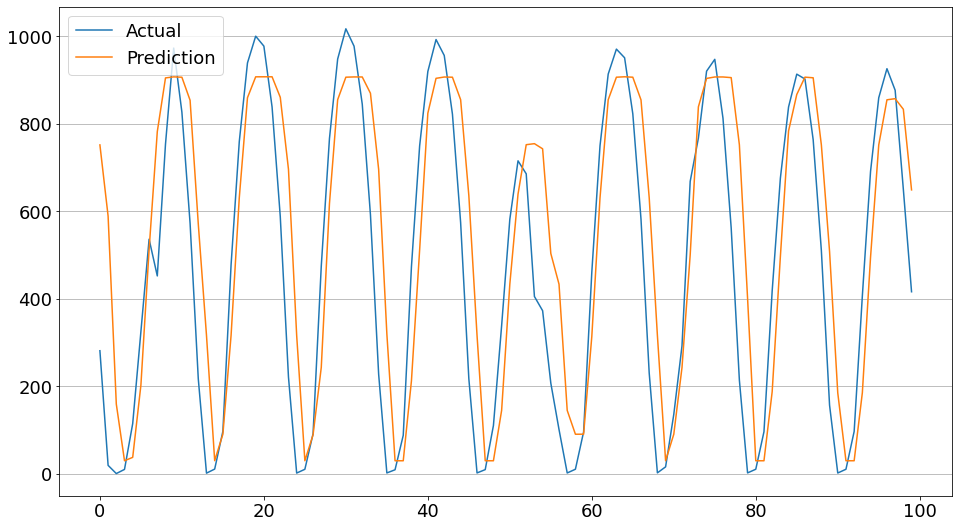

In [104]:
plt.figure(figsize=(16, 9))

start = -200
end = -100
forprint_test = test_target[start:end]
forprint_pred_cnn = yhat[start:end]

#pd.DataFrame({'Real':test_label,'Predicted':pred}).plot()
plt.plot(forprint_test,label='Actual')
plt.plot(forprint_pred_cnn, label='Prediction')

#plt.xticks(np.arange(0, 168, 24), labels=['2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08', '2020-02-09', '2021-02-10', '2021-02-11', '2021-02-12'])
plt.legend()
plt.show()